**Coronaviruses are a large family of viruses which may cause illness in animals or humans. In humans, several coronaviruses are known to cause respiratory infections ranging from the common cold to more severe diseases such as Middle East Respiratory Syndrome (MERS) and Severe Acute Respiratory Syndrome (SARS). The most recently discovered coronavirus causes coronavirus disease COVID-19.COVID-19 is the infectious disease caused by the most recently discovered coronavirus. This new virus and disease were unknown before the outbreak began in Wuhan, China, in December 2019.**


# **SOUTH KOREA**

                                         **Current Scenario**
The accumulated confirmation count in South korea is increasing exponentially after 22nd of feb. Till the date 15th of feb 2020 it was negligible. There are many reason for infection but most cases have similar reasons that they have visited to wuhan. South Korea has raised its coronavirus alert to the "highest level" as confirmed case numbers keep rising.South Korea has seen the largest number of confirmed cases after China. More than 4,800 people have confirmed the infection of coronavirus.  As the data set says the western part of the country is more affected. Daegu and Gyeongsangbukdo region of South Korea are highly infected by the coronavirus

**Libraries**

In [76]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px
from datetime import date, timedelta
from sklearn.cluster import KMeans
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, add_changepoints_to_plot
import plotly.offline as py
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from keras.models import Sequential
from keras.layers import LSTM,Dense
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator


# **Symptoms of Coronavirus**
 

In [77]:
#Percentage contribution of symptoms in confirmation of COVID

symptoms={'symptom':['Fever',
        'Dry cough',
        'Fatigue',
        'Sputum production',
        'Shortness of breath',
        'Muscle pain',
        'Sore throat',
        'Headache',
        'Chills',
        'Nausea or vomiting',
        'Nasal congestion',
        'Diarrhoea',
        'Haemoptysis',
        'Conjunctival congestion'],'percentage':[87.9,67.7,38.1,33.4,18.6,14.8,13.9,13.6,11.4,5.0,4.8,3.7,0.9,0.8]}

symptoms=pd.DataFrame(data=symptoms,index=range(14))
symptoms

,symptom,percentage
0,Fever,87.9
1,Dry cough,67.7
2,Fatigue,38.1
3,Sputum production,33.4
4,Shortness of breath,18.6
5,Muscle pain,14.8
6,Sore throat,13.9
7,Headache,13.6
8,Chills,11.4
9,Nausea or vomiting,5.0


**Bar Chart**

In [78]:
#Bar graph of percentage contribution of symptoms
fig = px.bar(symptoms[['symptom', 'percentage']].sort_values('percentage', ascending=False), 
             y="percentage", x="symptom", color='symptom', 
             log_y=True, template='ggplot2', title='Symptom of  Coronavirus')
fig.show()

**Pie Chart**

In [79]:
comp = pd.read_excel('/kaggle/input/covid19327/COVID-19-3.27-top30-500.xlsx')

In [80]:
df_patient = pd.read_csv("../input/patient/patient.csv")
df_route = pd.read_csv("../input/route/route.csv")

# **Looking into patient data**

In [81]:
df_patient.head()  

,id,sex,birth_year,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
0,1,female,1984.0,China,filtered at airport,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released
1,2,male,1964.0,Korea,filtered at airport,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released
2,3,male,1966.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released
3,4,male,1964.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released
4,5,male,1987.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaN,released


1.  **id** the ID of the patient (n-th confirmed patient)
2.  **sex** the sex of the patient
3.  **birth_year** the birth year of the patient
4.  **country** the country of the patient
5.  **region** the region of the patient
6.  **group** the collective infection
7.  **infection_reason** the reason of infection
8.  **infection_order** the order of infection
9.  **infected_by** the ID of who has infected the patient
10. **contact_number** the number of contacts with people
11. **confirmed_date** the date of confirmation
12. **released_date** the date of discharge
13. **deceased_date** the date of decease
14. **state** isolated / released / deceased

**Checking null value**

In [82]:
df_patient.isna().sum()


id                     0
sex                 4945
birth_year          4958
country                0
region              4957
group               5247
infection_reason    5188
infection_order     5293
infected_by         5258
contact_number      5281
confirmed_date         0
released_date       5296
deceased_date       5308
state                  0
dtype: int64

In [83]:
df_patient['birth_year'] = df_patient.birth_year.fillna(0.0).astype(int)
df_patient['birth_year'] = df_patient['birth_year'].map(lambda val: val if val > 0 else np.nan)

In [84]:
df_patient.confirmed_date = pd.to_datetime(df_patient.confirmed_date)
daily_count = df_patient.groupby(df_patient.confirmed_date).id.count()
accumulated_count = daily_count.cumsum()




**Age**

In [85]:
df_patient['age'] = 2020 - df_patient['birth_year'] 
df_patient['age'].head()

0    36.0
1    56.0
2    54.0
3    56.0
4    33.0
Name: age, dtype: float64

**Age Range**

In [86]:
#Dividing the groups into different ranges
import math
def group_age(age):
    if age >= 0: # not NaN
        if age % 10 != 0:
            lower = int(math.floor(age / 10.0)) * 10
            upper = int(math.ceil(age / 10.0)) * 10 - 1
            return f"{lower}-{upper}"
        else:
            lower = int(age)
            upper = int(age + 9) 
            return f"{lower}-{upper}"
    return "Unknown"


df_patient["age_range"] = df_patient["age"].apply(group_age)
df_patient["age_range"].head()

0    30-39
1    50-59
2    50-59
3    50-59
4    30-39
Name: age_range, dtype: object

In [87]:
patient=df_patient

**Preprocessing**

In [88]:
date_cols = ["confirmed_date", "released_date", "deceased_date"]
for col in date_cols:
    patient[col] = pd.to_datetime(patient[col])

In [89]:
patient["time_to_release_since_confirmed"] = patient["released_date"] - patient["confirmed_date"]

patient["time_to_death_since_confirmed"] = patient["deceased_date"] - patient["confirmed_date"]
patient["duration_since_confirmed"] = patient[["time_to_release_since_confirmed", "time_to_death_since_confirmed"]].min(axis=1)
patient["duration_days"] = patient["duration_since_confirmed"].dt.days
age_ranges = sorted(set([ar for ar in patient["age_range"] if ar != "Unknown"]))
patient["state_by_gender"] = patient["state"] + "_" + patient["sex"]


# **Confirmed Count**

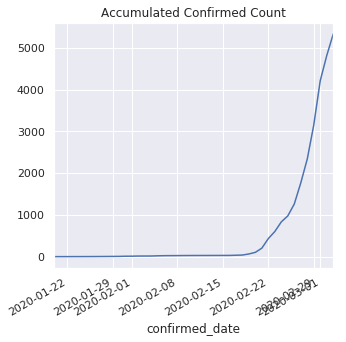

In [90]:
accumulated_count.plot()
plt.title('Accumulated Confirmed Count');

# **Time series Analysis**

In [ ]:
time = pd.read_csv("../input/novel-corona-virus-2019-dataset/covid_19_data.csv")

In [157]:
time = time[time['Country/Region']=='South Korea']

In [158]:
time = time.tail(14)

In [160]:
time.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Confirmed_new,Recovered_new,Deaths_new
29122,29123,05/25/2020,NaN,South Korea,2020-05-26 02:32:35,11225.0,269.0,10275.0,NaN,NaN,NaN
29574,29575,05/26/2020,NaN,South Korea,2020-05-27 02:32:31,11265.0,269.0,10295.0,40.0,20.0,0.0
30026,30027,05/27/2020,NaN,South Korea,2020-05-28 02:32:31,11344.0,269.0,10340.0,79.0,45.0,0.0
30475,30476,05/28/2020,NaN,South Korea,2020-05-29 02:32:50,11402.0,269.0,10363.0,58.0,23.0,0.0
31028,31029,05/29/2020,NaN,South Korea,2020-05-30 02:32:48,11441.0,269.0,10398.0,39.0,35.0,0.0


# **Confrim vs Recovery vs Death**

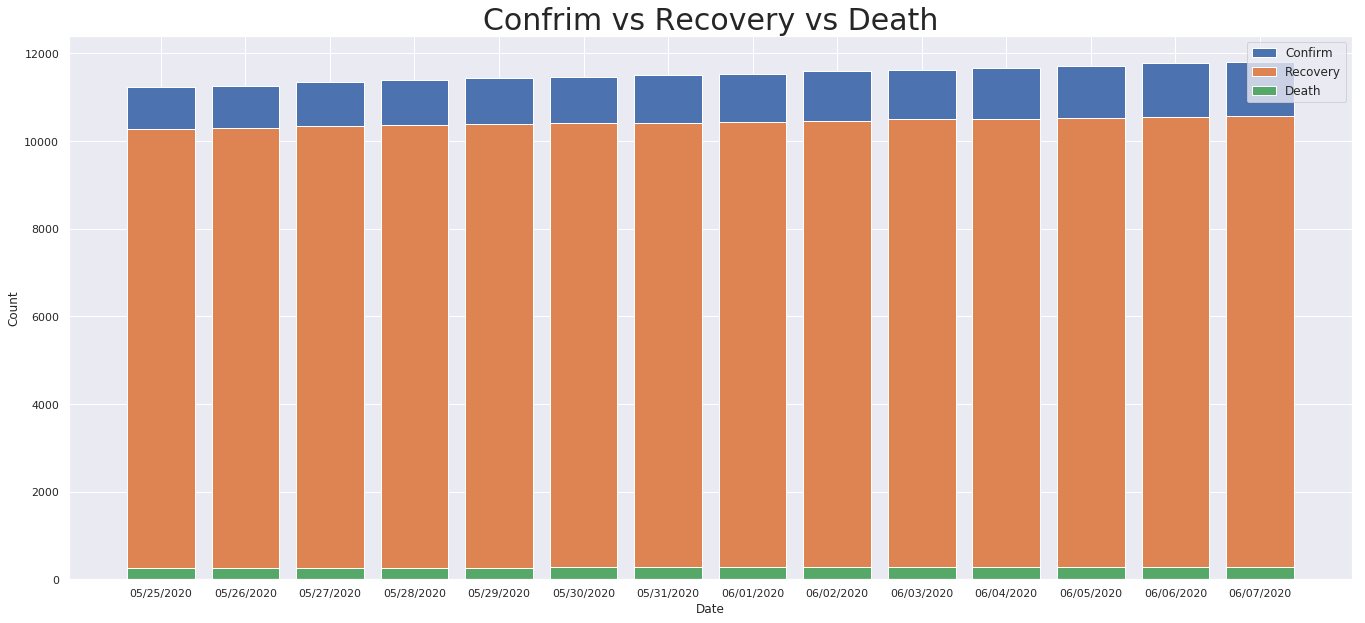

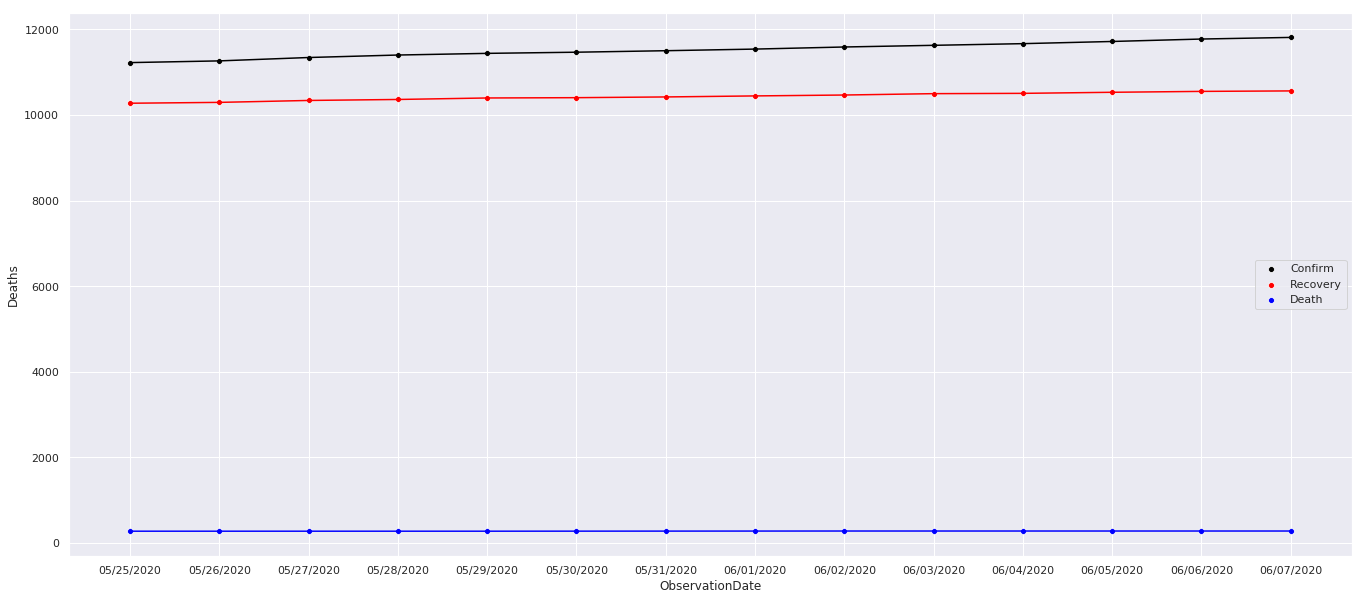

In [161]:
#Graphs of confirmed,recovered,death
plt.figure(figsize=(23,10))
plt.bar(time.ObservationDate, time.Confirmed,label="Confirm")
plt.bar(time.ObservationDate, time.Recovered,label="Recovery")
plt.bar(time.ObservationDate, time.Deaths,label="Death")
plt.xlabel('Date')
plt.ylabel("Count")
plt.legend(frameon=True, fontsize=12)
plt.title('Confrim vs Recovery vs Death',fontsize=30)
plt.show()

f, ax = plt.subplots(figsize=(23,10))
ax=sns.scatterplot(x="ObservationDate", y="Confirmed", data=time,
             color="black",label = "Confirm")
ax=sns.scatterplot(x="ObservationDate", y="Recovered", data=time,
             color="red",label = "Recovery")
ax=sns.scatterplot(x="ObservationDate", y="Deaths", data=time,
             color="blue",label = "Death")
plt.plot(time.ObservationDate,time.Confirmed,zorder=1,color="black")
plt.plot(time.ObservationDate,time.Recovered,zorder=1,color="red")
plt.plot(time.ObservationDate,time.Deaths,zorder=1,color="blue")

In [162]:
!pip install chart_studio


# Recovery Rate

In [163]:
import plotly.offline as py


# Stauts of person

In [165]:

#Pie chart
Total_confirmed = time['Confirmed'].sum()
Total_recovered = time['Recovered'].sum()
Total_death = time['Deaths'].sum()
data = [['Confirmed', Total_confirmed], ['Recovered', Total_recovered], ['Death', Total_death]] 
df = pd.DataFrame(data, columns = ['state', 'count']) 
fig = px.pie(df,
             values="count",
             names="state",
             title="State of Patient",
             template="seaborn")
fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
fig.show()

# **Daily Growth**

In [166]:
time['Confirmed_new'] = time['Confirmed']-time['Confirmed'].shift(1)
time['Recovered_new'] = time['Recovered']-time['Recovered'].shift(1)
time['Deaths_new'] = time['Deaths']-time['Deaths'].shift(1)


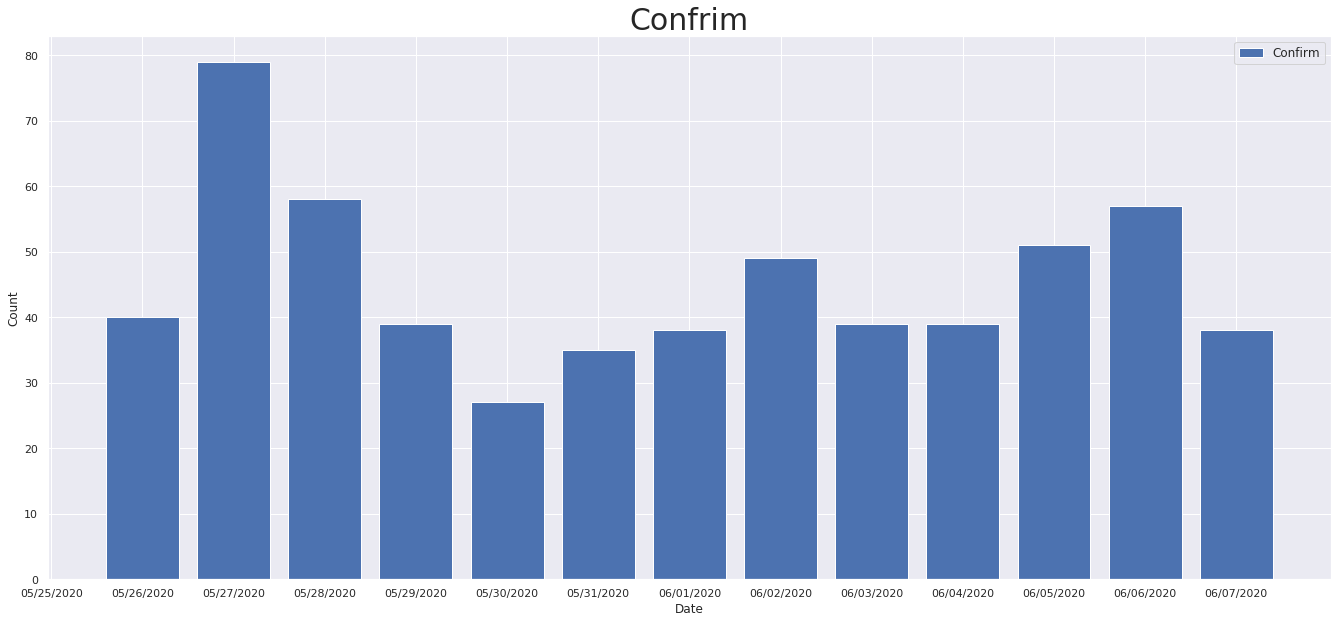

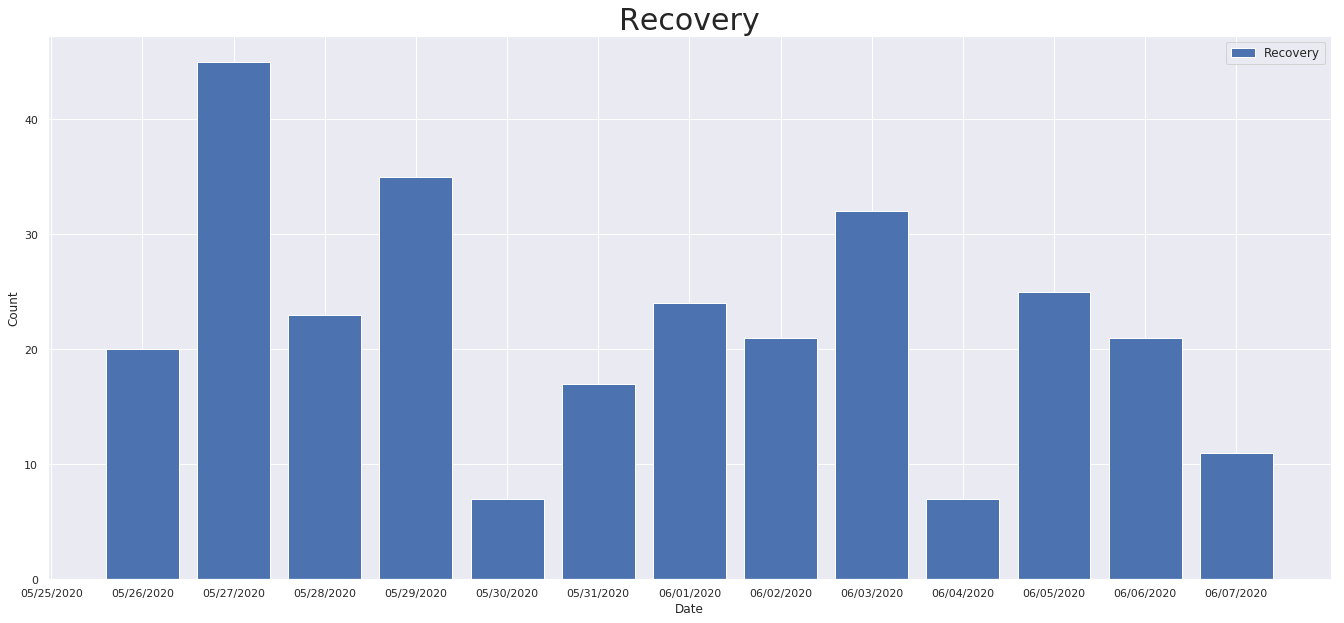

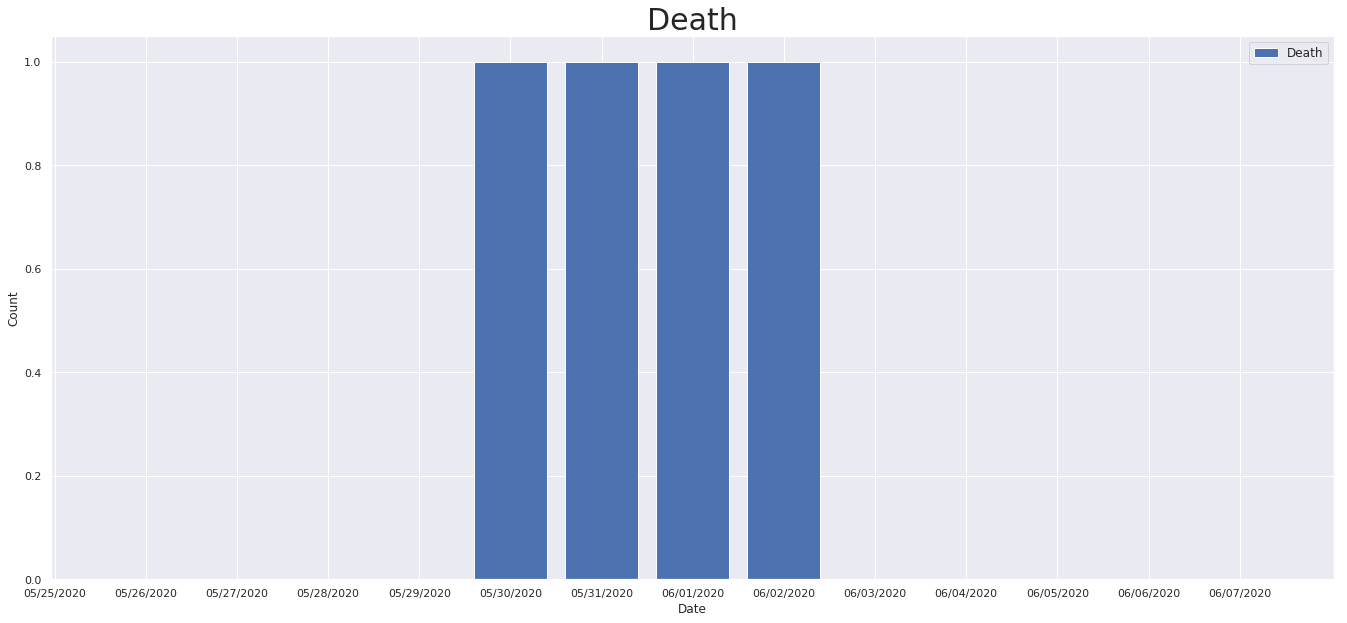

In [167]:
#Graphs of daily growth
plt.figure(figsize=(23,10))
plt.bar(time.ObservationDate, time.Confirmed_new,label="Confirm")
plt.xlabel('Date')
plt.ylabel("Count")
plt.legend(frameon=True, fontsize=12)
plt.title('Confrim',fontsize=30)
plt.show()


plt.figure(figsize=(23,10))
plt.bar(time.ObservationDate, time.Recovered_new,label="Recovery")
plt.xlabel('Date')
plt.ylabel("Count")
plt.legend(frameon=True, fontsize=12)
plt.title('Recovery',fontsize=30)
plt.show()

plt.figure(figsize=(23,10))

plt.bar(time.ObservationDate, time.Deaths_new,label="Death")
plt.xlabel('Date')
plt.ylabel("Count")
plt.legend(frameon=True, fontsize=12)
plt.title('Death',fontsize=30)
plt.show()



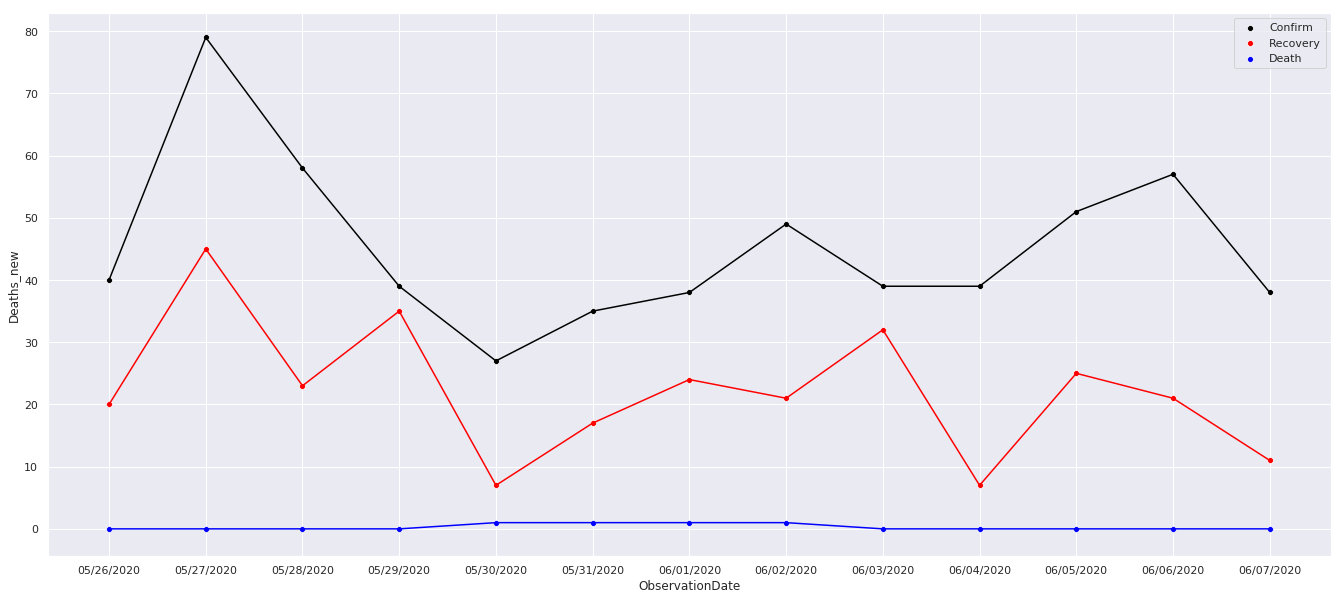

In [168]:
#line graph of daily growth
f, ax = plt.subplots(figsize=(23,10))
ax=sns.scatterplot(x="ObservationDate", y="Confirmed_new", data=time,
             color="black",label = "Confirm")
ax=sns.scatterplot(x="ObservationDate", y="Recovered_new", data=time,
             color="red",label = "Recovery")
ax=sns.scatterplot(x="ObservationDate", y="Deaths_new", data=time,
             color="blue",label = "Death")
plt.plot(time.ObservationDate,time.Confirmed_new,zorder=1,color="black")
plt.plot(time.ObservationDate,time.Recovered_new,zorder=1,color="red")
plt.plot(time.ObservationDate,time.Deaths_new,zorder=1,color="blue")

In [169]:
global_data = time

# **Growth Rate and Ratio**

In [170]:
# This functions smooths data.
def smoother(inputdata,w,imax):
    data = 1.0*inputdata
    data = data.replace(np.nan,1)
    data = data.replace(np.inf,1)
    #print(data)
    smoothed = 1.0*data
    normalization = 1
    for i in range(-imax,imax+1):
        if i==0:
            continue
        smoothed += (w**abs(i))*data.shift(i,axis=0)
        normalization += w**abs(i)
    smoothed /= normalization
    return smoothed

def growth_factor(confirmed):
    confirmed_iminus1 = confirmed.shift(1, axis=0)
    confirmed_iminus2 = confirmed.shift(2, axis=0)
    return (confirmed-confirmed_iminus1)/(confirmed_iminus1-confirmed_iminus2)

def growth_ratio(confirmed):
    confirmed_iminus1 = confirmed.shift(1, axis=0)
    return (confirmed/confirmed_iminus1)

# This is a function which plots (for in input country) the active, confirmed, and recovered cases, deaths, and the growth factor.
def plot_country_active_confirmed_recovered(country):
    
    # Plots Active, Confirmed, and Recovered Cases. Also plots deaths.
    country_data = global_data[global_data['Country/Region']==country]
    table = country_data.drop(['SNo','Province/State', 'Last Update'], axis=1)
    table['ActiveCases'] = table['Confirmed'] - table['Recovered'] - table['Deaths']
    table2 = pd.pivot_table(table, values=['ActiveCases','Confirmed', 'Recovered','Deaths'], index=['ObservationDate'], aggfunc=np.sum)
    table3 = table2.drop(['Deaths'], axis=1)
   
    # Growth Factor
    w = 0.5
    table2['GrowthFactor'] = growth_factor(table2['Confirmed'])
    table2['GrowthFactor'] = smoother(table2['GrowthFactor'],w,5)

    # 2nd Derivative
    table2['2nd_Derivative'] = np.gradient(np.gradient(table2['Confirmed'])) #2nd derivative
    table2['2nd_Derivative'] = smoother(table2['2nd_Derivative'],w,7)


    #Plot confirmed[i]/confirmed[i-1], this is called the growth ratio
    table2['GrowthRatio'] = growth_ratio(table2['Confirmed'])
    table2['GrowthRatio'] = smoother(table2['GrowthRatio'],w,5)
    
    #Plot the growth rate, we will define this as k in the logistic function presented at the beginning of this notebook.
    table2['GrowthRate']=np.gradient(np.log(table2['Confirmed']))
    table2['GrowthRate'] = smoother(table2['GrowthRate'],0.5,3)
    
    # horizontal line at growth rate 1.0 for reference
    x_coordinates = [1, 100]
    y_coordinates = [1, 1]
    f, ax = plt.subplots(figsize=(15,5))
    table2['Deaths'].plot(title='Deaths')
    plt.show()
    f, ax = plt.subplots(figsize=(15,5))
    table2['GrowthFactor'].plot(title='Growth Factor')
    plt.plot(x_coordinates, y_coordinates) 
    plt.show()
    f, ax = plt.subplots(figsize=(15,5))
    table2['2nd_Derivative'].plot(title='2nd_Derivative')
    plt.show()
    f, ax = plt.subplots(figsize=(15,5))
    table2['GrowthRatio'].plot(title='Growth Ratio')
    plt.plot(x_coordinates, y_coordinates)
    plt.show()
    f, ax = plt.subplots(figsize=(15,5))
    table2['GrowthRate'].plot(title='Growth Rate')
    plt.show()

    return 

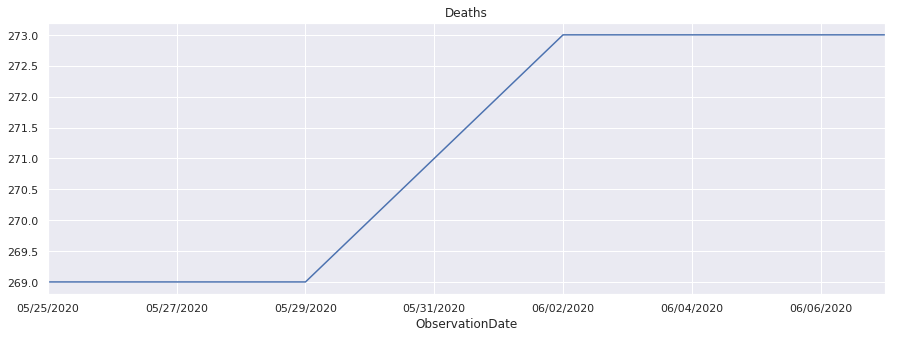

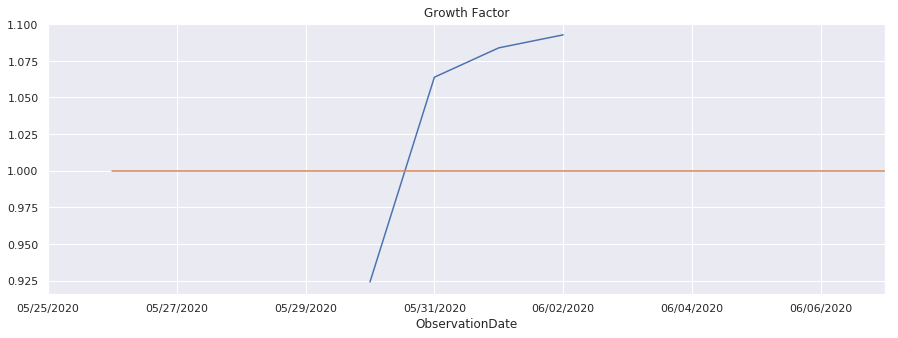

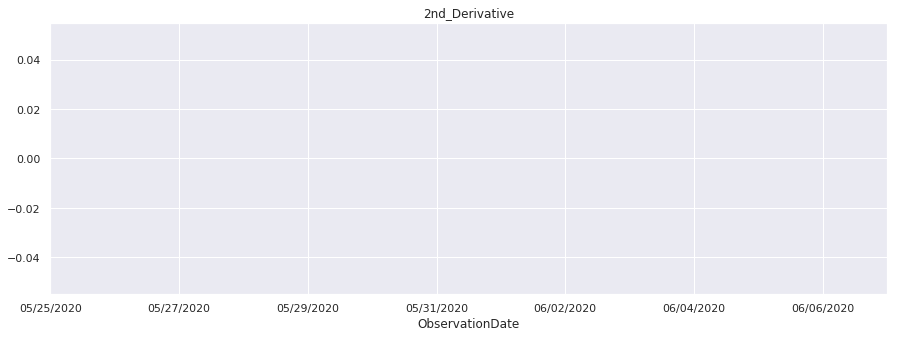

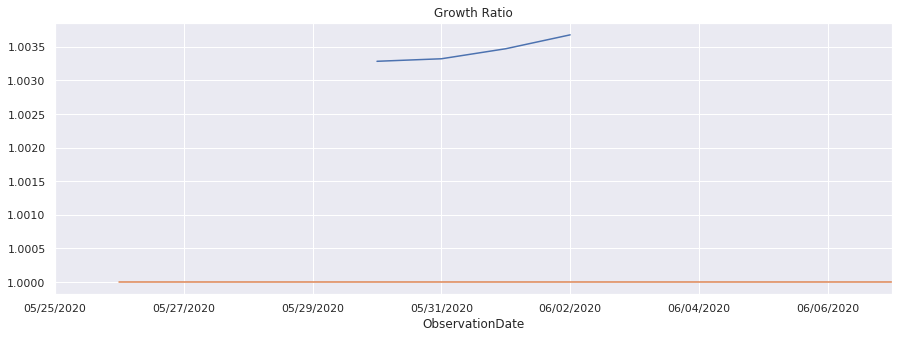

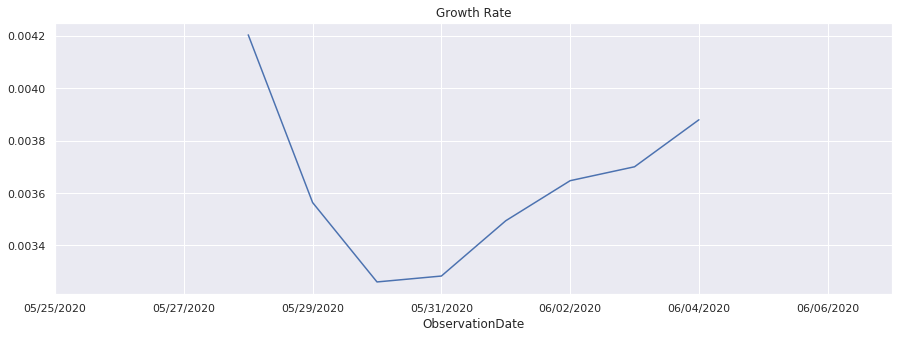

In [171]:
plot_country_active_confirmed_recovered('South Korea')


# **Current State of Patient**

In [172]:
infected_patient = patient.shape[0]
rp = patient.loc[patient["state"] == "released"].shape[0]
dp = patient.loc[patient["state"] == "deceased"].shape[0]
ip = patient.loc[patient["state"]== "isolated"].shape[0]
rp=rp/patient.shape[0]
dp=dp/patient.shape[0]
ip=ip/patient.shape[0]
print("The percentage of recovery is "+ str(rp*100) )
print("The percentage of deceased is "+ str(dp*100) )
print("The percentage of isolated is "+ str(ip*100) )


The percentage of recovery is 0.6569069069069069
The percentage of deceased is 0.37537537537537535
The percentage of isolated is 98.96771771771772


In [173]:
states = pd.DataFrame(patient["state"].value_counts())
states["status"] = states.index
states.rename(columns={"state": "count"}, inplace=True)

fig = px.pie(states,
             values="count",
             names="status",
             title="Current state of patients",
             template="seaborn")
fig.update_traces(rotation=90, pull=0.05, textinfo="value+percent+label")
fig.show()

**People who released**

In [174]:
released = df_patient[df_patient.state == 'released']
released.head()

,id,sex,birth_year,country,region,group,infection_reason,infection_order,infected_by,contact_number,...,released_date,deceased_date,state,age,age_range,time_to_release_since_confirmed,time_to_death_since_confirmed,duration_since_confirmed,duration_days,state_by_gender
0,1,female,1984.0,China,filtered at airport,NaN,visit to Wuhan,1.0,NaN,45.0,...,2020-02-06,NaT,released,36.0,30-39,17 days,NaT,17 days,17.0,released_female
1,2,male,1964.0,Korea,filtered at airport,NaN,visit to Wuhan,1.0,NaN,75.0,...,2020-02-05,NaT,released,56.0,50-59,12 days,NaT,12 days,12.0,released_male
2,3,male,1966.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,16.0,...,2020-02-12,NaT,released,54.0,50-59,17 days,NaT,17 days,17.0,released_male
3,4,male,1964.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,95.0,...,2020-02-09,NaT,released,56.0,50-59,13 days,NaT,13 days,13.0,released_male
4,5,male,1987.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,31.0,...,2020-03-02,NaT,released,33.0,30-39,32 days,NaT,32 days,32.0,released_male


**People who are in isolated state**

In [175]:
isolated_state = df_patient[df_patient.state == 'isolated']
isolated_state.head()

,id,sex,birth_year,country,region,group,infection_reason,infection_order,infected_by,contact_number,...,released_date,deceased_date,state,age,age_range,time_to_release_since_confirmed,time_to_death_since_confirmed,duration_since_confirmed,duration_days,state_by_gender
24,25,female,1946.0,Korea,capital area,NaN,contact with patient,2.0,27.0,12.0,...,NaT,NaT,isolated,74.0,70-79,NaT,NaT,NaT,NaN,isolated_female
25,26,male,1968.0,Korea,capital area,NaN,contact with patient,1.0,27.0,0.0,...,NaT,NaT,isolated,52.0,50-59,NaT,NaT,NaT,NaN,isolated_male
26,27,female,1982.0,China,capital area,NaN,visit to China,1.0,NaN,40.0,...,NaT,NaT,isolated,38.0,30-39,NaT,NaT,NaT,NaN,isolated_female
28,29,male,1938.0,Korea,capital area,NaN,contact with patient,4.0,83.0,117.0,...,NaT,NaT,isolated,82.0,80-89,NaT,NaT,NaT,NaN,isolated_male
29,30,female,1952.0,Korea,capital area,NaN,contact with patient,5.0,29.0,27.0,...,NaT,NaT,isolated,68.0,60-69,NaT,NaT,NaT,NaN,isolated_female


**Patient who died**

In [176]:
dead = df_patient[df_patient.state == 'deceased']
dead.head()

,id,sex,birth_year,country,region,group,infection_reason,infection_order,infected_by,contact_number,...,released_date,deceased_date,state,age,age_range,time_to_release_since_confirmed,time_to_death_since_confirmed,duration_since_confirmed,duration_days,state_by_gender
37,38,female,1963.0,Korea,Daegu,NaN,NaN,NaN,NaN,NaN,...,NaT,2020-02-23,deceased,57.0,50-59,NaT,5 days,5 days,5.0,deceased_female
53,54,male,1963.0,Korea,Gyeongsangbuk-do,Cheongdo Daenam Hospital,NaN,NaN,NaN,NaN,...,NaT,2020-02-23,deceased,57.0,50-59,NaT,4 days,4 days,4.0,deceased_male
54,55,male,1961.0,Korea,Gyeongsangbuk-do,Cheongdo Daenam Hospital,NaN,NaN,NaN,NaN,...,NaT,2020-02-23,deceased,59.0,50-59,NaT,4 days,4 days,4.0,deceased_male
102,103,male,1957.0,Korea,Gyeongsangbuk-do,Cheongdo Daenam Hospital,NaN,NaN,NaN,NaN,...,NaT,2020-02-19,deceased,63.0,60-69,NaT,-1 days,-1 days,-1.0,deceased_male
106,107,male,1953.0,Korea,Gyeongsangbuk-do,Cheongdo Daenam Hospital,NaN,NaN,NaN,NaN,...,NaT,2020-02-24,deceased,67.0,60-69,NaT,3 days,3 days,3.0,deceased_male


# **Age distribution of the released**

In [177]:
#Pie chart of released
agr = released[released.age_range!="Unknown"]
fig = px.pie(agr,
             names="age_range",
             title="Age of released person",
             template="seaborn")
fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
fig.show()

# **Age distribution of isolated person**

In [178]:
#Pie chart of isolated
agi = isolated_state[isolated_state.age_range!="Unknown"]
fig = px.pie(agi,
             names="age_range",
             title="Age of isolated person",
             template="seaborn")
fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
fig.show()

# **Age distribution of death**

In [179]:
#pie chart dead
agd = dead[dead.age_range!="Unknown"]
fig = px.pie(agd,
             names="age_range",
             title="Age of Dead person",
             template="seaborn")
fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
fig.show()

                                      ** Age distribution of deceased **
 Here, the graph shows the age distribution of the deceased by gender. We can clearly see older people are more likely to be infected, especially older people with underlying lung disease and having problems in their respiration. The age group of 60 to 70 yr are more infected than the rest of the population. As  Dr. Steven Gambert, professor of medicine and director of geriatrics at the University of Maryland School of Medicine says “ Older people have  higher risk of underlying health conditions, older people are already under physical stress, and their immune systems, even if not significantly compromised, simply do not have the same “ability to fight viruses and bacteria”

In [180]:
male_dead = dead[dead.sex=='male']
female_dead = dead[dead.sex=='female']

# **Age distribution of death by gender**

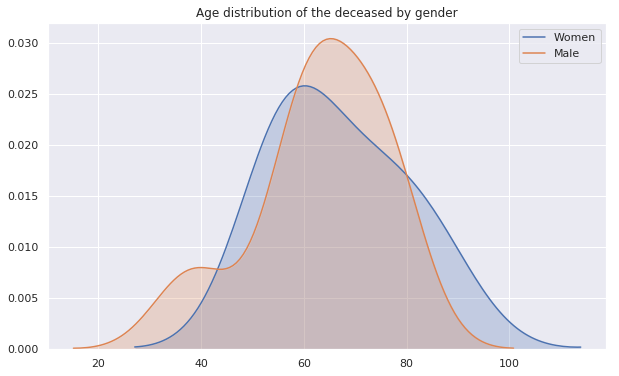

In [181]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
plt.title("Age distribution of the deceased by gender")
sns.kdeplot(data=female_dead['age'], label="Women", shade=True)
sns.kdeplot(data=male_dead['age'],label="Male" ,shade=True)



                                    **Gender distribution of deceased **
The graph shows the age distribution of deceased gender where men are more likely to die from coronavirus  than women. New research  has found that men, particularly middle-aged and older men, are having a harder time fighting off the virus than women. Chinese researchers found that while the infection rate among men and women is the same, the death rate among men is 2.8% compared with 1.7% for women. As there are a few reasons men are more likely to die from the new coronavirus. Women have a heightened immune response. During Middle East respiratory syndrome coronavirus 32% of men died of the infection compared with 25.8% of women. 

**Comparison of released and deceased by age**

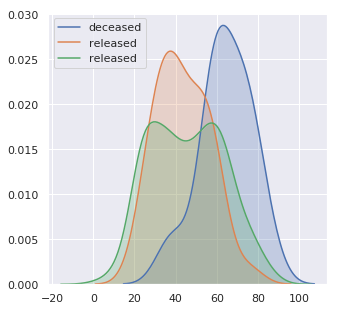

In [182]:
sns.kdeplot(data=dead['age'],label='deceased', shade=True)
sns.kdeplot(data=released['age'],label='released', shade=True)
sns.kdeplot(data=isolated_state['age'],label='released', shade=True)

# **Death by gender**

In [183]:
#Pie chart of death by gender
fig = px.pie( values=dead.groupby(['sex']).size().values,names=dead.groupby(['sex']).size().index)
fig.update_layout(
    font=dict(
        size=15,
        color="#242323"
    )
    )   
    
py.iplot(fig)

# **Isolation by gender**

In [184]:
#Pie chart isolated by gender
fig = px.pie( values=isolated_state.groupby(['sex']).size().values,names=isolated_state.groupby(['sex']).size().index)
fig.update_layout(
    font=dict(
        size=15,
        color="#242323"
    )
    )   
    
py.iplot(fig)

# **Recovery by gender**

In [185]:
#Pie chart of released by gender
fig = px.pie( values=released.groupby(['sex']).size().values,names=released.groupby(['sex']).size().index)
fig.update_layout(
    font=dict(
        size=15,
        color="#242323"
    )
    )   
    
py.iplot(fig)

# **Reason for the infection**

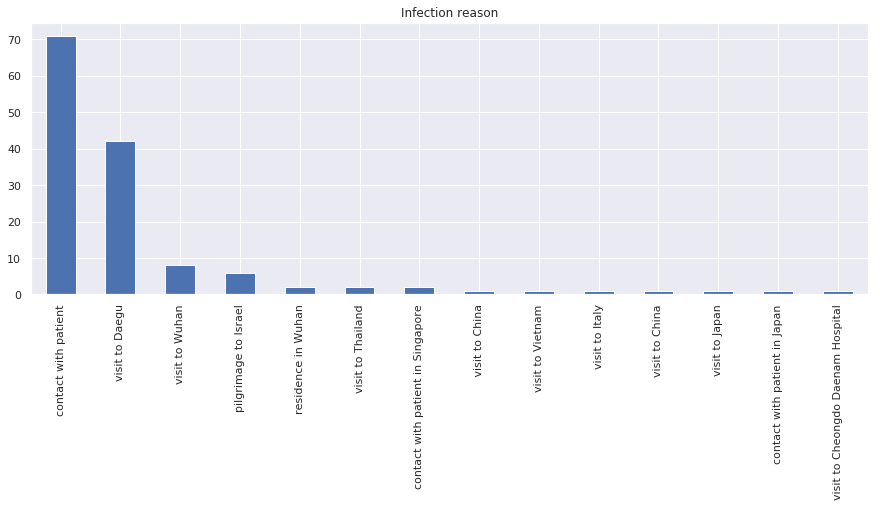

In [186]:
#Bar graph of distribution of percentage for reasons of infection
plt.figure(figsize=(15,5))
plt.title('Infection reason')
df_patient.infection_reason.value_counts().plot.bar();

In [187]:
#Pie chart for the above bar graph
fig = px.pie( values=df_patient.groupby(['infection_reason']).size().values,names=df_patient.groupby(['infection_reason']).size().index)
fig.update_layout(
    font=dict(
        size=15,
        color="#242323"
    )
    )   
    
py.iplot(fig)

In [188]:
inf_rsn =  df_patient['infection_reason']
inf_rsn  = inf_rsn.dropna()

**There are many effective reasons for the coronavirus infection. According to the dataset the major reason for the infection is being in contact with patients. There are so many different reasons for the cause of infection which are visits to countries and regions like daegu, wuhan, thailand, china, vietnam, italy.**

# **State of Patient**

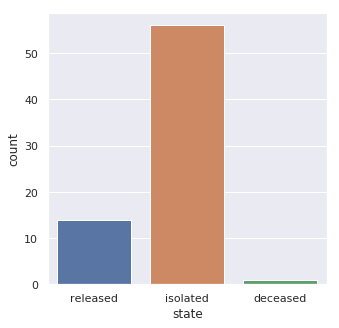

In [189]:
sns.set(rc={'figure.figsize':(5,5)})
sns.countplot(x=df_patient['state'].loc[
    (df_patient['infection_reason']=='contact with patient')
])

In [190]:
fig = px.pie( values=df_patient.groupby(['state']).size().values,names=df_patient.groupby(['state']).size().index)
fig.update_layout(
    font=dict(
        size=15,
        color="#242323"
    )
    )   
    
py.iplot(fig)

**State of male patient**

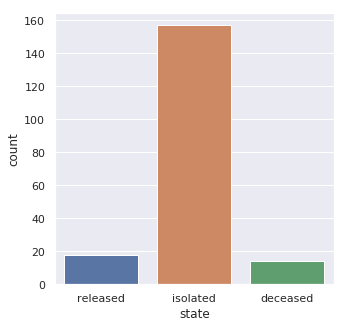

In [191]:
sns.set(rc={'figure.figsize':(5,5)})
sns.countplot(x=df_patient['state'].loc[(df_patient['sex']=="male")])

**State of female patient**

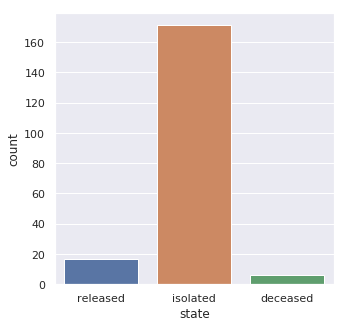

In [126]:
sns.set(rc={'figure.figsize':(5,5)})
sns.countplot(x=df_patient['state'].loc[(df_patient['sex']=="female")])

The first case of coronavirus in the country on January 20. At the moment, 31 patients were discharged from hospitals after making a full recovery from the virus and 22 deaths are reported. In total, over 105 thousand people have been tested until now. 

# **State of patient(male and female) vs age **

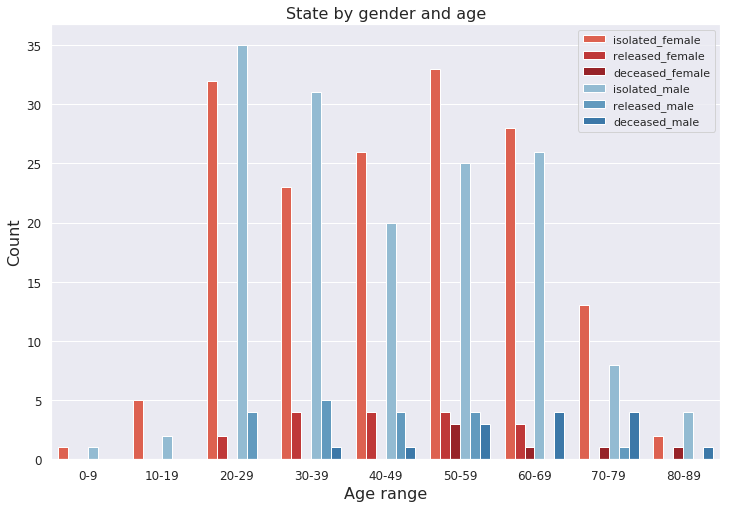

In [127]:
age_gender_hue_order =["isolated_female", "released_female", "deceased_female",
                       "isolated_male", "released_male", "deceased_male"]
custom_palette = sns.color_palette("Reds")[3:6] + sns.color_palette("Blues")[2:5]

plt.figure(figsize=(12, 8))
sns.countplot(x = "age_range",
              hue="state_by_gender",
              order=age_ranges,
              hue_order=age_gender_hue_order,
              palette=custom_palette,
              data=patient)
plt.title("State by gender and age", fontsize=16)
plt.xlabel("Age range", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc="upper right")
plt.show()

In [128]:
df_patient.head(1)

,id,sex,birth_year,country,region,group,infection_reason,infection_order,infected_by,contact_number,...,released_date,deceased_date,state,age,age_range,time_to_release_since_confirmed,time_to_death_since_confirmed,duration_since_confirmed,duration_days,state_by_gender
0,1,female,1984.0,China,filtered at airport,NaN,visit to Wuhan,1.0,NaN,45.0,...,2020-02-06,NaT,released,36.0,30-39,17 days,NaT,17 days,17.0,released_female


# **Region by age and state**

# **Looking route data**

In [129]:
df_route.head()

,id,date,province,city,visit,latitude,longitude
0,1,2020-01-19,Incheon,Jung-gu,airport,37.460459,126.440680
1,1,2020-01-20,Incheon,Seo-gu,hospital_isolated,37.478832,126.668558
2,2,2020-01-22,Gyeonggi-do,Gimpo-si,airport,37.562143,126.801884
3,2,2020-01-23,Seoul,Jung-gu,hospital_isolated,37.567454,127.005627
4,3,2020-01-20,Incheon,Jung-gu,airport,37.460459,126.440680


**Checking if is there any null value**

In [130]:
df_route.isna().sum()

id           0
date         0
province     0
city         0
visit        0
latitude     0
longitude    0
dtype: int64

In [131]:
clus=df_route.loc[:,['id','latitude','longitude']]


# **Patient in city**

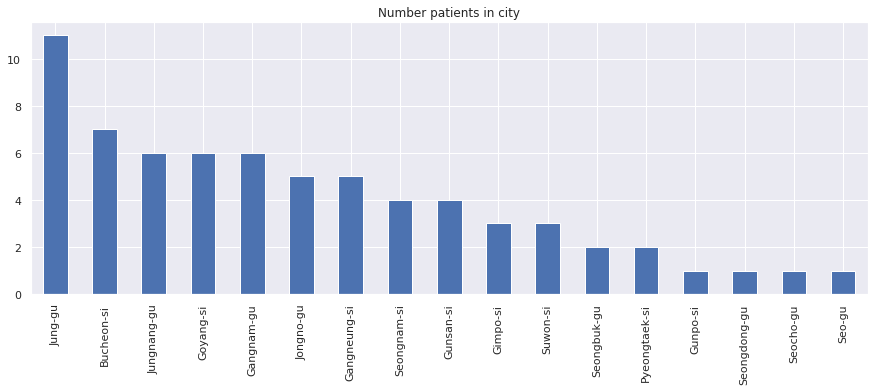

In [132]:
#city wise patients distribution bar graph
plt.figure(figsize=(15,5))
plt.title('Number patients in city')
df_route.city.value_counts().plot.bar();

# **Patients in Provience/State**

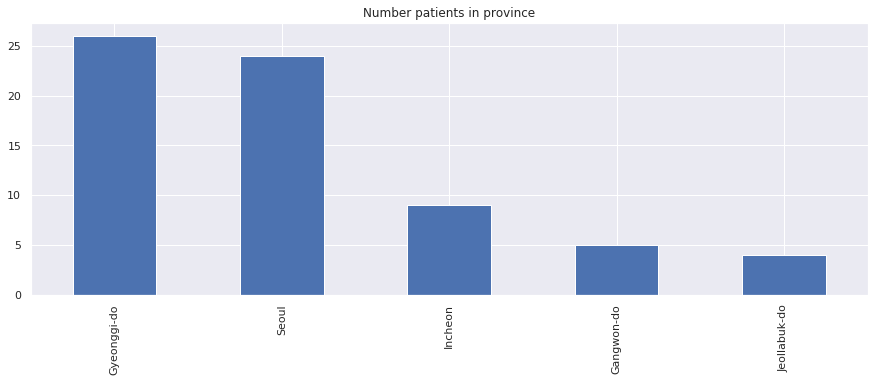

In [133]:
#Province wise patients distribution bar graph
plt.figure(figsize=(15,5))
plt.title('Number patients in province')
df_route.province.value_counts().plot.bar();

**73.5% cases of Coronavirus cases are of state Gyeongii-do and Seoul**

**Places where people get affected**

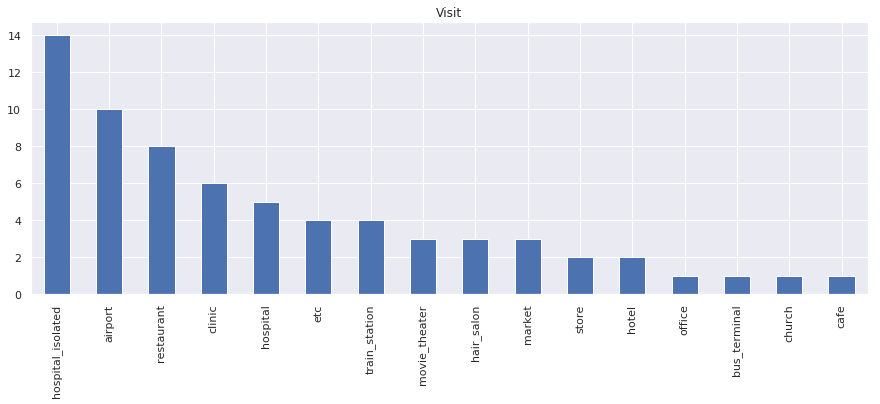

In [134]:
#Major places contributing to infection
plt.figure(figsize=(15,5))
plt.title('Visit')
df_route.visit.value_counts().plot.bar();


# **Time from confirmation to release or death**

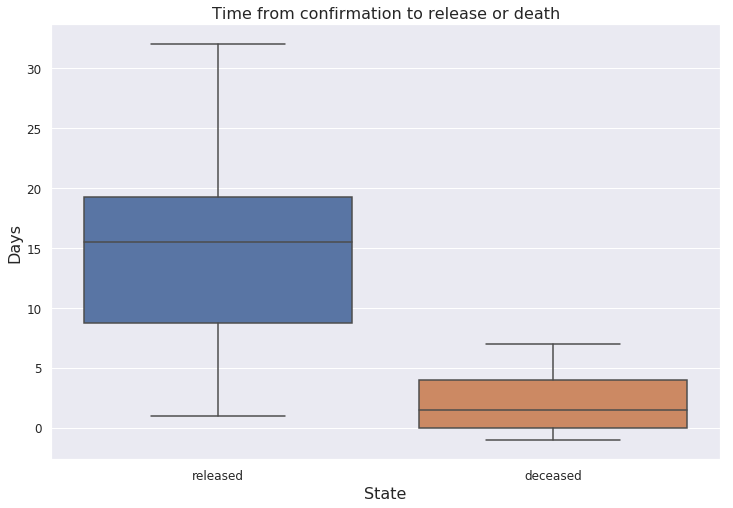

In [135]:
plt.figure(figsize=(12, 8))
sns.boxplot(x="state",
            y="duration_days",
            order=["released", "deceased"],
            data=patient)
plt.title("Time from confirmation to release or death", fontsize=16)
plt.xlabel("State", fontsize=16)
plt.ylabel("Days", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# **Time from confirmation to release or death by gender**

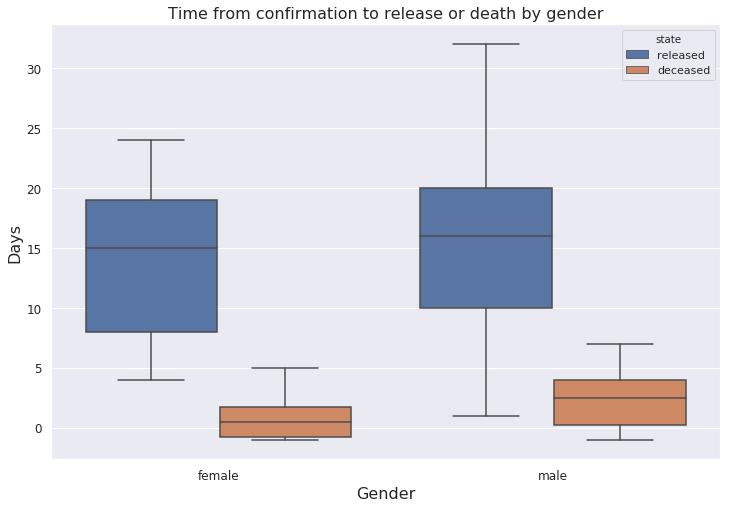

In [136]:
order_duration_sex = ["female", "male"]
plt.figure(figsize=(12, 8))
sns.boxplot(x="sex",
            y="duration_days",
            order=order_duration_sex,
            hue="state",            
            hue_order=["released", "deceased"],
            data=patient)
plt.title("Time from confirmation to release or death by gender",
          fontsize=16)
plt.xlabel("Gender", fontsize=16)
plt.ylabel("Days", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# **Time from confirmation to release or death**

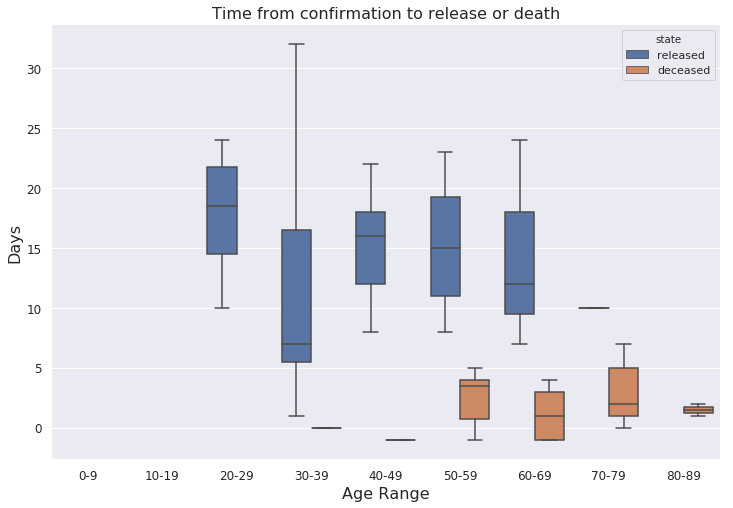

In [137]:
order_duration_age = sorted(patient["age_range"].unique())[:-1]
plt.figure(figsize=(12, 8))
sns.boxplot(x="age_range",
            y="duration_days",
            order=order_duration_age,
            hue="state",
            hue_order=["released", "deceased"],
            data=patient)
plt.title("Time from confirmation to release or death", fontsize=16)
plt.xlabel("Age Range", fontsize=16)
plt.ylabel("Days", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

As the suspects of coronavirus are kept under observation. After the observation it has been found that the people who are released or who have great chances of recovery had sustained  10-20 days in hospitals. On the other hand the people who are deceased were found dead in 0-4 days.

In [138]:
data = daily_count.resample('D').first().fillna(0).cumsum()
data = data[20:]
x = np.arange(len(data)).reshape(-1, 1)
y = data.values

# **Regression Model**

In [139]:
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(hidden_layer_sizes=[32, 32, 10], max_iter=50000, alpha=0.0005, random_state=26)
_=model.fit(x, y)

In [140]:
test = np.arange(len(data)+7).reshape(-1, 1)
pred = model.predict(test)
prediction = pred.round().astype(int)
week = [data.index[0] + timedelta(days=i) for i in range(len(prediction))]
dt_idx = pd.DatetimeIndex(week)
predicted_count = pd.Series(prediction, dt_idx)

**Graphical representatoin of current confirmed and predicted confirmed**

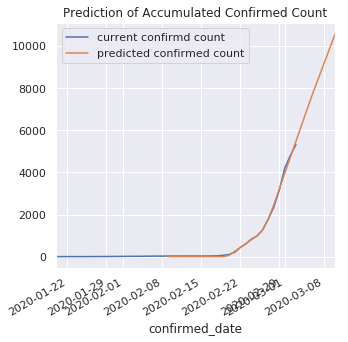

In [141]:
accumulated_count.plot()
predicted_count.plot()
plt.title('Prediction of Accumulated Confirmed Count')
plt.legend(['current confirmd count', 'predicted confirmed count'])
plt.show()

As we can see that the predicting graph(red line) and actual line are coinciding hence our model is accurate.